In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data set and displaying the first five rows

data=pd.read_csv('Breast_cancer.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.info()
# Gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
data.isna().sum()
# Finding out the total number of NaN values in each column

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
#Describes the essential values of the dataset for example mean, max, min 

data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
#Making visualisations in order to find correlations between the columns
import seaborn as sns
sns.pairplot(data)

In [7]:
#Applying logistic regression and training our model

import sklearn
new_features=data[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [8]:
#Displaying the confusion matrix in order to check the truly positive outcomes

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[41  7]
 [ 1 65]]


In [9]:
#Checking the accuracy of our model

sklearn.metrics.accuracy_score(y_test,y_pred)

0.9298245614035088

In [32]:
print("The accuracy of logistic regression model is 92.98%")

The accuracy of logistic regression model is 92.98%


In [10]:
#Applying KNN to our dataset and traing our model

from sklearn.model_selection import train_test_split

In [11]:
x=data[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y=data[['diagnosis']]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33)

In [13]:
from sklearn.neighbors import  KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred=knn.predict(x_test)

In [17]:
#Displaying the confusion matrix in order to check the truly positive outcomes

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[ 61  12]
 [ 15 100]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        73
           1       0.89      0.87      0.88       115

    accuracy                           0.86       188
   macro avg       0.85      0.85      0.85       188
weighted avg       0.86      0.86      0.86       188



In [19]:
#checking the value of k for which the error rate is the minimum

y = np.array(y_test['diagnosis']).reshape(188)
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y))

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

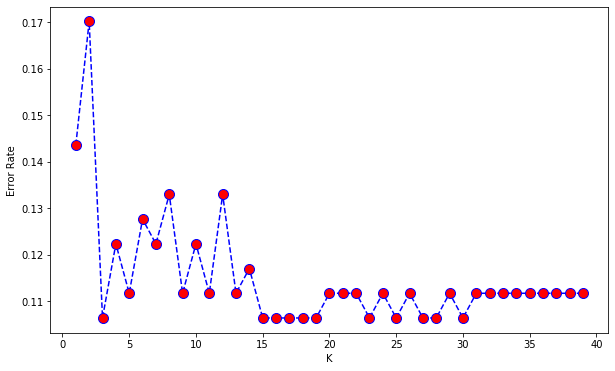

In [21]:
#Making a graph of the error rate against K to determine the most suitable K

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel("K")
plt.ylabel("Error Rate")

In [22]:
#Determining the accuracy of our model

sklearn.metrics.accuracy_score(y_test,pred)

0.8563829787234043

In [25]:
#Changing the value of K to increase the accuracy

knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
sklearn.metrics.accuracy_score(y_test,pred)

0.8936170212765957

In [31]:
print("The accuracy of the KNN model is 89.36%")

The accuracy of the KNN model is 89.36%


In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']],data[['diagnosis']], test_size=0.25,random_state=109)
# 75% training and 25% test

In [28]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') #Linnear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


In [30]:
print("The accuracy of the SVM model is 90.91%")

The accuracy of the SVM model is 90.91%


In [43]:
print("As our models are compared the maximum accuracy of predicions obtained for this dataset is by the logistic regression model.   The accuracy is 92.98%")

As our models are compared the maximum accuracy of predicions obtained for this dataset is by the logistic regression model.   The accuracy is 92.98%
